In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [4]:
import freqepid

# 1. parameters

In [5]:
T = 60
T0 = 40

In [6]:
GPi = np.load('data/GPi.npz')

## observation parameters

In [7]:
alpha = 0.01
r_Y = 10

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [8]:
d = 2
beta = np.array([0.75, -2.95])

In [9]:
r_I = 100
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

In [10]:
mu = np.log(100)

$$I_{[-T_0,0)} = \exp(\mu_0)$$

# 2. simulation

In [11]:
num_sim = 1000

## load simulation

In [13]:
data = pd.read_feather('data/simulation_randinf_3.feather')

In [14]:
data

,sim,date,R,EI,infection,EY,death,intervention
0,0,0,4.414662,441.463115,480.0,0.956069,1,0
1,0,1,4.414662,472.207524,475.0,0.962545,0,0
2,0,2,4.414662,583.517000,588.0,0.968338,1,0
3,0,3,4.414662,762.157505,670.0,0.974015,1,0
4,0,4,4.414662,997.240682,955.0,0.981203,0,0
...,...,...,...,...,...,...,...,...
59995,999,55,0.648378,686.970707,727.0,28.330299,27,1
59996,999,56,0.648378,653.139142,671.0,26.949973,22,1
59997,999,57,0.648378,620.762316,653.0,25.620683,22,1
59998,999,58,0.648378,589.514828,716.0,24.328280,22,1


# 3. Fit results

In [15]:
result = pd.read_feather('coverage_epidemia_nbinom_randinf_3.feather')

In [16]:
result

,b[0],b[1],"V[0,0]","V[1,0]","V[0,1]","V[1,1]"
0,0.548836,-2.561613,0.030246,-0.035019,-0.035019,0.045230
1,0.489947,-2.722608,0.031160,-0.038748,-0.038748,0.055666
2,0.638239,-2.695532,0.031292,-0.037765,-0.037765,0.051253
3,0.808286,-3.107823,0.039385,-0.047364,-0.047364,0.065572
4,0.667451,-2.956819,0.033419,-0.039298,-0.039298,0.052770
...,...,...,...,...,...,...
995,1.002707,-3.201048,0.043201,-0.048255,-0.048255,0.060474
996,0.153386,-2.154126,0.019223,-0.024915,-0.024915,0.036723
997,0.757956,-2.918883,0.037972,-0.043880,-0.043880,0.057291
998,0.577012,-2.698499,0.030951,-0.037379,-0.037379,0.050987


# 4. Confidence Region coverage test

In [17]:
model = freqepid.Model(GPi['g'], GPi['pi'], alpha, K, T0, 'nbinom')

In [18]:
bepi = np.zeros((num_sim, d))
Ts_epi = np.zeros(num_sim)
ps_epi = np.zeros(num_sim)

In [19]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    bepi[iter_sim] = result.iloc[iter_sim,:2].to_numpy()
    Ts_epi[iter_sim] = (bepi[iter_sim,1]-beta[1])/np.sqrt(result.iloc[iter_sim,-1])
    ps_epi[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_epi[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.001522 sec.
2-th simulation finished, 0.004940 sec.
3-th simulation finished, 0.002740 sec.
4-th simulation finished, 0.000381 sec.
5-th simulation finished, 0.000405 sec.
6-th simulation finished, 0.006483 sec.
7-th simulation finished, 0.001179 sec.
8-th simulation finished, 0.000327 sec.
9-th simulation finished, 0.000357 sec.
10-th simulation finished, 0.000342 sec.
11-th simulation finished, 0.000250 sec.
12-th simulation finished, 0.000250 sec.
13-th simulation finished, 0.001346 sec.
14-th simulation finished, 0.000546 sec.
15-th simulation finished, 0.000290 sec.
16-th simulation finished, 0.000279 sec.
17-th simulation finished, 0.002201 sec.
18-th simulation finished, 0.000400 sec.
19-th simulation finished, 0.000310 sec.
20-th simulation finished, 0.000270 sec.
21-th simulation finished, 0.000353 sec.
22-th simulation finished, 0.000300 sec.
23-th simulation finished, 0.000277 sec.
24-th simulation finished, 0.000515 sec.
25-th simulation finished

466-th simulation finished, 0.000092 sec.
467-th simulation finished, 0.000094 sec.
468-th simulation finished, 0.000093 sec.
469-th simulation finished, 0.000093 sec.
470-th simulation finished, 0.000116 sec.
471-th simulation finished, 0.000095 sec.
472-th simulation finished, 0.000095 sec.
473-th simulation finished, 0.000097 sec.
474-th simulation finished, 0.000092 sec.
475-th simulation finished, 0.000095 sec.
476-th simulation finished, 0.000097 sec.
477-th simulation finished, 0.000096 sec.
478-th simulation finished, 0.000094 sec.
479-th simulation finished, 0.000094 sec.
480-th simulation finished, 0.000091 sec.
481-th simulation finished, 0.000095 sec.
482-th simulation finished, 0.000095 sec.
483-th simulation finished, 0.000093 sec.
484-th simulation finished, 0.000095 sec.
485-th simulation finished, 0.000094 sec.
486-th simulation finished, 0.000092 sec.
487-th simulation finished, 0.000095 sec.
488-th simulation finished, 0.000096 sec.
489-th simulation finished, 0.0000

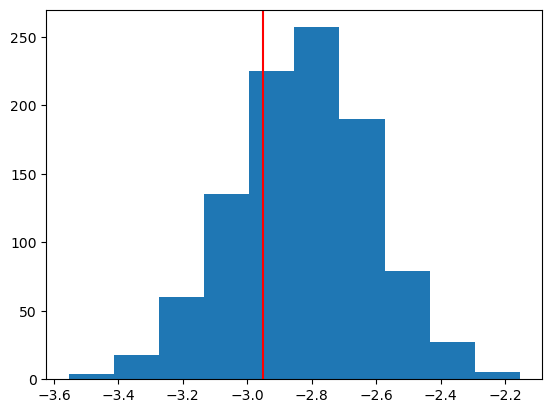

In [20]:
plt.hist(bepi[:,1])
plt.axvline(beta[1], color='red')

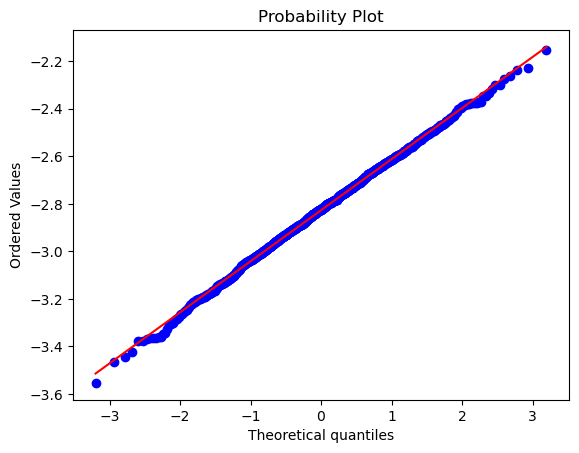

In [21]:
stats.probplot(bepi[:,1], dist = 'norm', plot=plt, fit=True)
# plt.plot([0, 1], [0, 1], color='black')
plt.show()

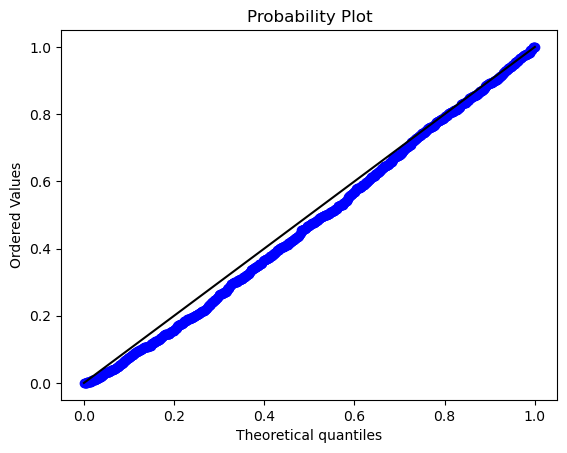

In [22]:
stats.probplot(ps_epi, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [23]:
np.mean(np.abs(ps_epi) > 0.05)

0.923